# Information Theory

https://en.wikipedia.org/wiki/Information_theory  
https://www.basicknowledge101.com/pdf/km/Entropy%20(information%20theory).pdf  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01'
end = '2023-04-01'
symbol = 'LT.NS'

In [3]:
df = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,1308.400024,1318.900024,1303.000000,1309.949951,1226.583984,3123998
2020-01-02 00:00:00+05:30,1312.000000,1348.000000,1311.000000,1345.300049,1259.684326,4335359
2020-01-03 00:00:00+05:30,1344.949951,1344.949951,1330.150024,1335.050049,1250.086670,2059871
2020-01-06 00:00:00+05:30,1331.000000,1332.000000,1314.099976,1316.750000,1232.951172,2646905
2020-01-07 00:00:00+05:30,1328.000000,1339.500000,1313.750000,1320.500000,1236.462524,2077893


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-24 00:00:00+05:30,2206.000000,2219.350098,2153.050049,2166.149902,2166.149902,1449544
2023-03-27 00:00:00+05:30,2175.050049,2190.000000,2150.000000,2154.000000,2154.000000,1540581
2023-03-28 00:00:00+05:30,2167.750000,2169.800049,2122.449951,2133.600098,2133.600098,1627243
2023-03-29 00:00:00+05:30,2137.649902,2159.300049,2121.000000,2147.449951,2147.449951,2372385
2023-03-31 00:00:00+05:30,2156.500000,2176.949951,2150.550049,2164.199951,2164.199951,1489542


In [6]:
x = np.array(df['Adj Close']).squeeze()

In [7]:
import collections

outcomes = [item for item, count in collections.Counter(x).items() if count > 1]

In [8]:
outcomes = np.round(outcomes, 2)
outcomes

array([ 881.25, 1450.45, 1744.9 , 1672.93, 1912.95, 2024.45, 2062.75,
       2177.55])

In [9]:
outcome_probabilities = [0.50, 0.50, 0.50, 0.50]

In [10]:
H = outcomes

for p in outcome_probabilities:
    H += (p*np.log2(p))

H = -H

print(H)

[ -879.25 -1448.45 -1742.9  -1670.93 -1910.95 -2022.45 -2060.75 -2175.55]


In [11]:
data = {'Repeat Adj Close':outcomes,
        'Entropy':H}

In [12]:
IT_df = pd.DataFrame(data)
IT_df

,Repeat Adj Close,Entropy
0,879.25,-879.25
1,1448.45,-1448.45
2,1742.90,-1742.90
3,1670.93,-1670.93
4,1910.95,-1910.95
5,2022.45,-2022.45
6,2060.75,-2060.75
7,2175.55,-2175.55


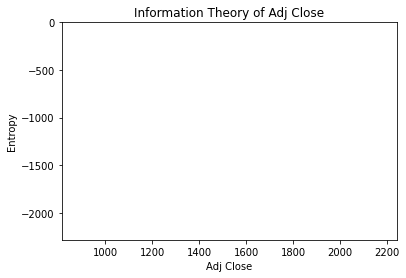

In [13]:
plt.bar(IT_df['Repeat Adj Close'], IT_df['Entropy'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Adj Close")
plt.ylabel("Entropy")
plt.title("Information Theory of Adj Close")
plt.show()

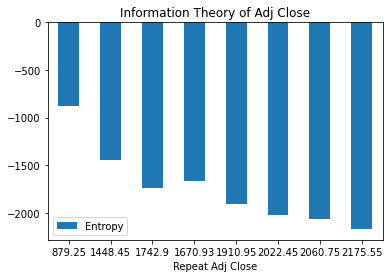

In [14]:
ax = IT_df.plot.bar(x='Repeat Adj Close', y='Entropy', rot=0, title = "Information Theory of Adj Close")